# Feature Selection

In [1]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

In [2]:
hotel_rev = pd.read_csv('data/HotelRevHelpfulness.csv')
print(hotel_rev.shape)
hotel_rev.head()

(486, 25)


,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


In [3]:
y = hotel_rev.pop('reviewHelpfulness').values
hotel_rev.pop('hotelId')
X = hotel_rev.values
hotel_rev.shape

(486, 23)

## Filter-based Feature Selection
### Feature Scoring - two methods  
1. Chi square statistic
2. Information Gain

In [4]:
chi2_score, pval = chi2(X, y)
chi2_score
# The chi square scores for all the features

array([1.17643855e+00, 1.25630861e+00, 2.97935332e+00, 4.99241616e+02,
       2.09687468e+01, 4.63515335e+00, 1.60567118e+01, 2.34205853e+01,
       1.22221503e-01, 2.01609093e-01, 5.11397162e-01, 4.38593706e-02,
       4.29417810e-02, 1.10399662e+01, 7.01736499e+00, 1.50630136e+01,
       1.35095136e+03, 4.73150717e-03, 3.15477433e-03, 1.96131502e+00,
       2.26290946e-01, 5.28034618e-03, 9.95572153e-03])

In [5]:
i_scores = mutual_info_classif(X,y)
i_scores
# The i-gain scores for all the features

array([0.03032673, 0.0364553 , 0.        , 0.04961006, 0.06186212,
       0.01284828, 0.        , 0.02311209, 0.03611293, 0.03554378,
       0.07801285, 0.04401936, 0.05499523, 0.02811825, 0.04245476,
       0.        , 0.064196  , 0.        , 0.        , 0.03479178,
       0.0362286 , 0.        , 0.00649685])

In [6]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)
# correlation is low

SpearmanrResult(correlation=0.25368520320060894, pvalue=0.24280095426925305)

In [7]:
mi = dict()

for i,j in zip(hotel_rev.columns,i_scores):
    mi[i]=j

df = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df.head(10)

,I-Gain
stdevRatingUser,0.078013
numberTermsEntry,0.064196
numReviewsHotel,0.061862
stdevRatingHotel,0.054995
numReviewsUser,0.049610
aveRatingHotel,0.044019
completeness_2,0.042455
stdevHelpfulnessRatioUser,0.036455
numberTermsSummaryQuote,0.036229
subRatingStdevUser,0.036113


### Image Segmentation Data

In [8]:
seg_data = pd.read_csv('data/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [9]:
y = seg_data.pop('Class').values
X = seg_data.values
feature_names = seg_data.columns

### Feature Selection

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()

In [11]:
mi = dict()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=1/2)
i_scores = mutual_info_classif(X_train, y_train)

for i,j in zip(feature_names,i_scores):
    mi[i]=j
 
df = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df.head(10)

,I-Gain
RAWRED-MEAN,1.254327
INTENSITY-MEAN,1.156573
HUE-MEAN,1.152088
RAWGREEN-MEAN,1.133340
VALUE-MEAN,1.104400
RAWBLUE-MEAN,1.096678
REGION-CENTROID-ROW,0.969066
SATURATION-MEAN,0.955819
EXBLUE-MEAN,0.940812
EXGREEN-MEAN,0.930035


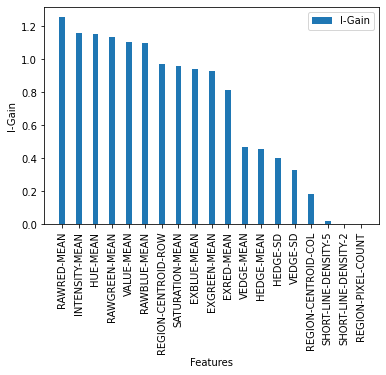

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)

ax.xaxis.set_major_locator(mticker.FixedLocator(range(0,n)))
ax.set_xticklabels(list(df.index), rotation = 90)

ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()

plt.show()

## Select *k* Best Features
We rank the features using information gain (well mutual information) and select the _k_ best to build a classifier.  
We iterate through increasing values of *k*.  
`SelectKBest` is a _transform_ that transforms the training data.


In [16]:
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    seg_NB = mnb.fit(X_tR_new, y_train)
    y_dash = seg_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

df['Accuracy'] = acc_scores
df.head(10)

,I-Gain,Accuracy
RAWRED-MEAN,1.254327,0.553247
INTENSITY-MEAN,1.156573,0.711688
HUE-MEAN,1.152088,0.678788
RAWGREEN-MEAN,1.133340,0.696970
VALUE-MEAN,1.104400,0.677922
RAWBLUE-MEAN,1.096678,0.670996
REGION-CENTROID-ROW,0.969066,0.779221
SATURATION-MEAN,0.955819,0.797403
EXBLUE-MEAN,0.940812,0.795671
EXGREEN-MEAN,0.930035,0.786147


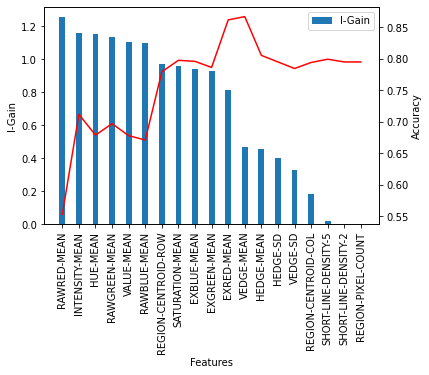

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax2.plot(df.index, df["Accuracy"], color='red', label='Accuracy')

ax.xaxis.set_major_locator(mticker.FixedLocator(range(0,n)))

ax.set_xticklabels(list(df.index), rotation = 90)

ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
ax.legend()

plt.show()

---
## Wrapper
Forward Sequential Search on Image Segmentation data.  
`scikit learn` does not support Wrapper feature selection so we use `MLxtend`.  
http://rasbt.github.io/mlxtend/
So you will probably need to install some libraries:  
`pip install mlxtend`  
`pip install joblib`

In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)

seg_data = pd.read_csv('data/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [20]:
y = seg_data.pop('Class').values
X = seg_data.values
feature_names = seg_data.columns


In [21]:
feature_names

Index(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN'],
      dtype='object')

Run forward sequential wrapper search up to 10 features using 10-fold xval.  

In [22]:
sfs_forward = SFS(knn, 
                  k_features=19, 
                  forward=True, 
                  floating=False, 
                  verbose=1,
                  scoring='accuracy',
                  cv=10, n_jobs = -1)

sfs_forward = sfs_forward.fit(X, y, 
                              custom_feature_names=feature_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    2.0s finished
Features: 1/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished
Features: 5/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of

Plot and see that performance stabilises after 6 features

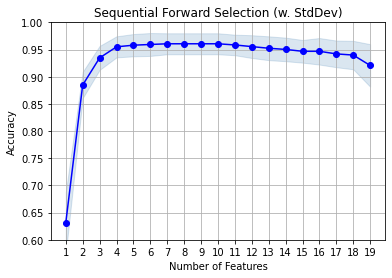

('REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN')


In [23]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_forward.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

Try backward selection back to 2 features

In [24]:
sfs_backward = SFS(knn, 
                  k_features=2, 
                  forward=False, 
                  floating=False, 
                  verbose=1,
                  scoring='accuracy',
                  cv=10, n_jobs = -1)

sfs_backward = sfs_backward.fit(X, y, 
                              custom_feature_names=feature_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.7s finished
Features: 18/2[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.6s finished
Features: 17/2[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.6s finished
Features: 16/2[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished
Features: 15/2[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 14/2[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of

Plot and see similar performance

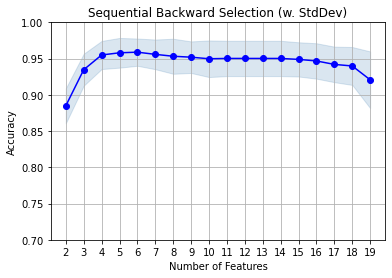

('REGION-CENTROID-ROW', 'RAWRED-MEAN')


In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_backward.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

### Lasso feature selection
Logistic regression with L1 regularisation.   
`SelectFromModel` will select the top features out of max features   
The `C` parameter in `LogisticRegression` is the regularisation parameter, smaller values means stronger regularisation, default is 1.  You can experiment with the value of `C` to see how many features go to zero.     
You can select a specific number of features from `SelectFromModel` using the `max_features` parameter



In [57]:
seg_data = pd.read_csv('data/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [58]:
y = seg_data.pop('Class').values
X = seg_data.values
feature_names = seg_data.columns

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr_selector = SelectFromModel(LogisticRegression(penalty="l1", 
                     C=.001, solver="liblinear"), max_features=X.shape[1])
lr_selector.fit(X, y)

X=pd.DataFrame(X)
lr_support = lr_selector.get_support()
lr_feature = X.loc[:,lr_support].columns.tolist()
print(str(len(lr_feature)), 'selected features')  
print('Selected features:')
lr_feature

11 selected features
Selected features:


[0, 1, 2, 6, 8, 10, 12, 13, 14, 15, 16]

In [69]:
for i in lr_feature:
    print(feature_names[i])



REGION-CENTROID-COL
REGION-CENTROID-ROW
REGION-PIXEL-COUNT
VEDGE-SD
HEDGE-SD
RAWRED-MEAN
RAWGREEN-MEAN
EXRED-MEAN
EXBLUE-MEAN
EXGREEN-MEAN
VALUE-MEAN


### Random Forest feature selection
Algorithm will select top features out of max features.   
Note that the features selected are different

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100),  max_features=X.shape[1])
rf_selector.fit(X, y)

X=pd.DataFrame(X)
rf_support = rf_selector.get_support()
rf_feature = X.loc[:,rf_support].columns.tolist()
print(str(len(rf_feature)), 'selected features')   
print('Selected features:')
rf_feature

9 selected features
Selected features:


[1, 9, 10, 11, 12, 14, 15, 16, 18]

## Put it all together

Select the top 8 features from chi2 and IG and combine with embedded techniques

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest 

In [61]:
X_scal=MinMaxScaler().fit_transform(X)    # scale the values as chi2 doesn't handle negative values
chi_selector = SelectKBest(chi2, k=8)
chi_selector.fit(X_scal, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')   
print('Selected features:')
chi_feature


8 selected features
Selected features:


[1, 9, 10, 11, 12, 14, 16, 18]

In [62]:
ig_selector = SelectKBest(mutual_info_classif, k=8)
ig_selector.fit(X, y)
ig_support = ig_selector.get_support()
ig_feature = X.loc[:,ig_support].columns.tolist()
print(str(len(ig_feature)), 'selected features')   
print('Selected features:')
ig_feature

8 selected features
Selected features:


[9, 10, 11, 12, 15, 16, 17, 18]

In [63]:
# put all selection together

feature_selection_df = pd.DataFrame({'Feature':feature_names,'Random Forest':rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(20)

,Feature,Random Forest,Total
1,VALUE-MEAN,True,1
2,REGION-CENTROID-ROW,True,1
3,RAWRED-MEAN,True,1
4,RAWGREEN-MEAN,True,1
5,RAWBLUE-MEAN,True,1
6,INTENSITY-MEAN,True,1
7,HUE-MEAN,True,1
8,EXGREEN-MEAN,True,1
9,EXBLUE-MEAN,True,1
10,VEDGE-SD,False,0
